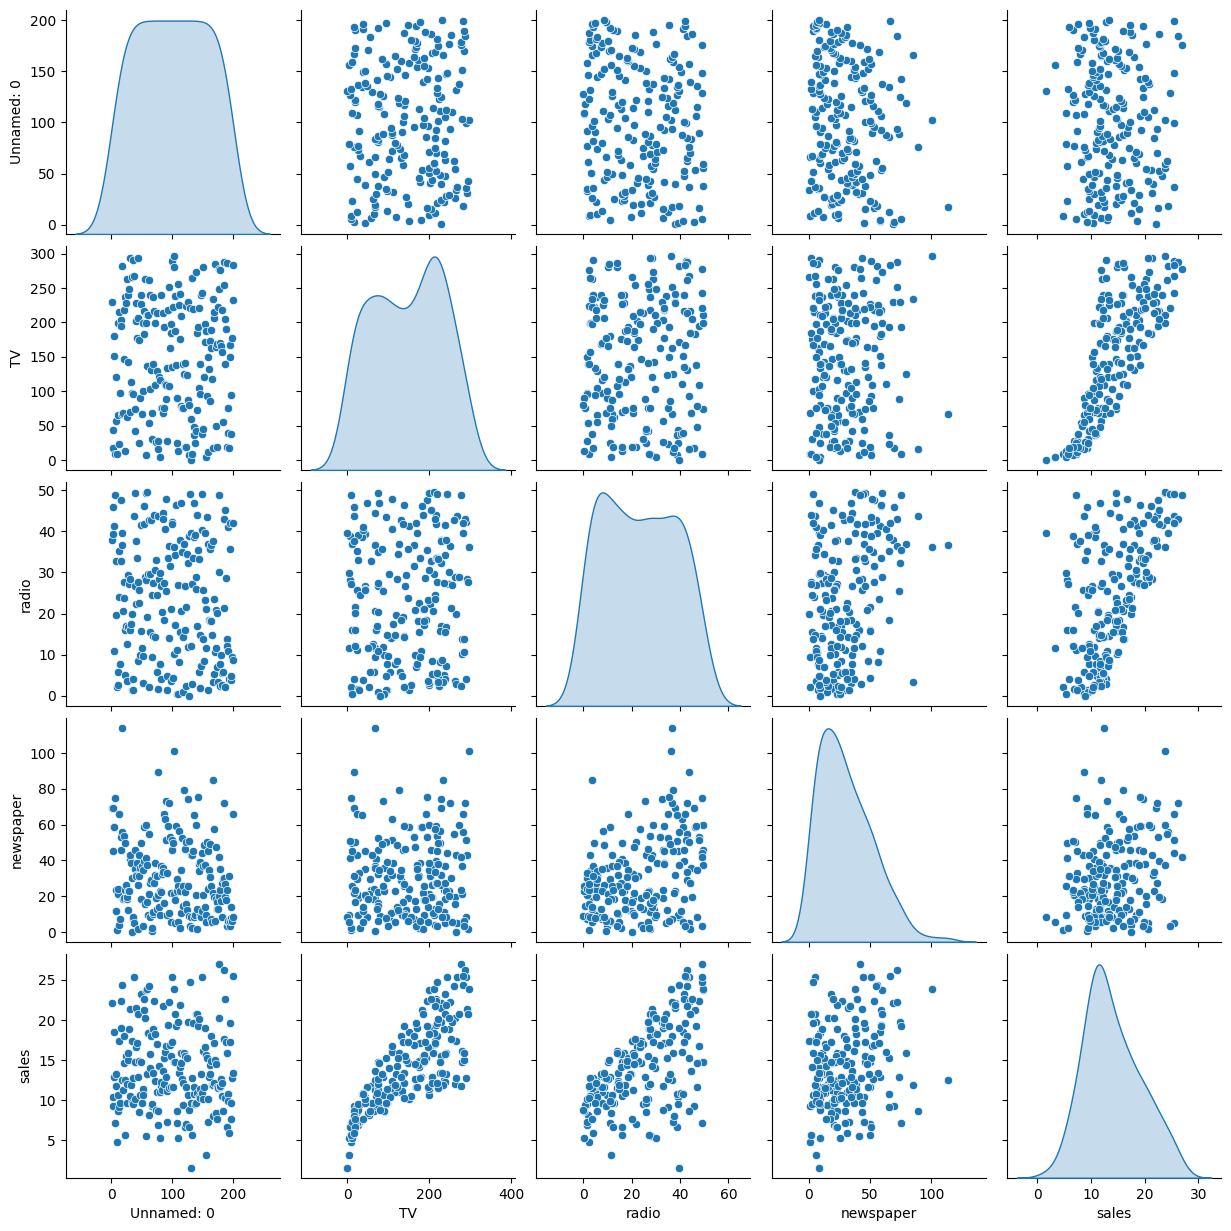

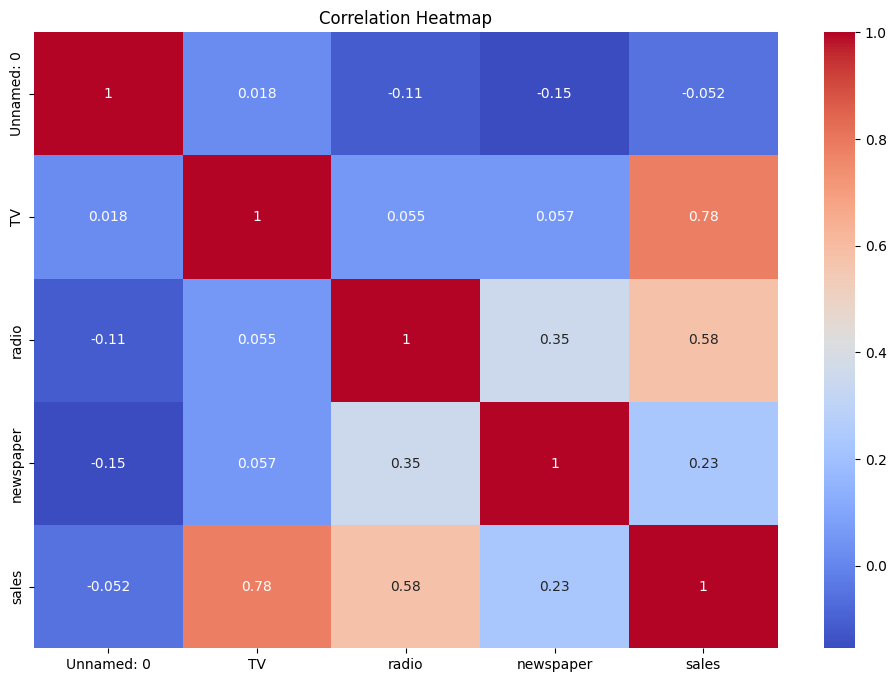

Features after multicollinearity check: ['TV', 'radio', 'newspaper']
Feature Importance:
[3.82821891 2.79998467 0.06078571]
R-squared value: 0.8993745522003003


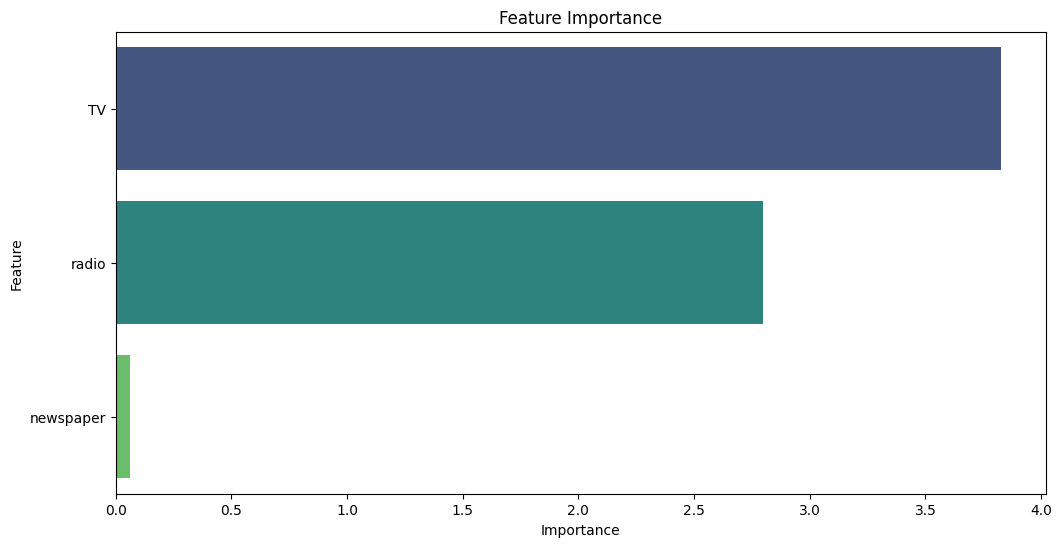

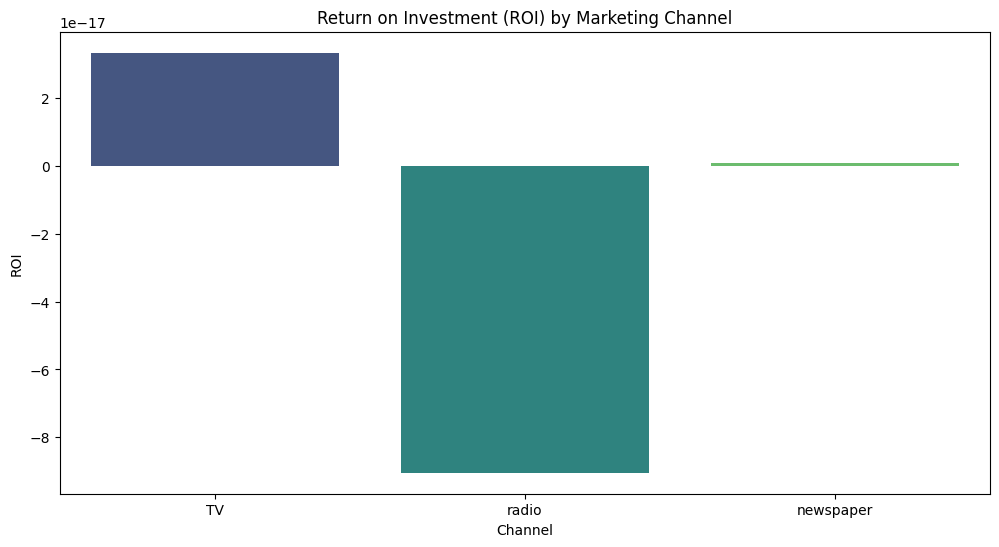

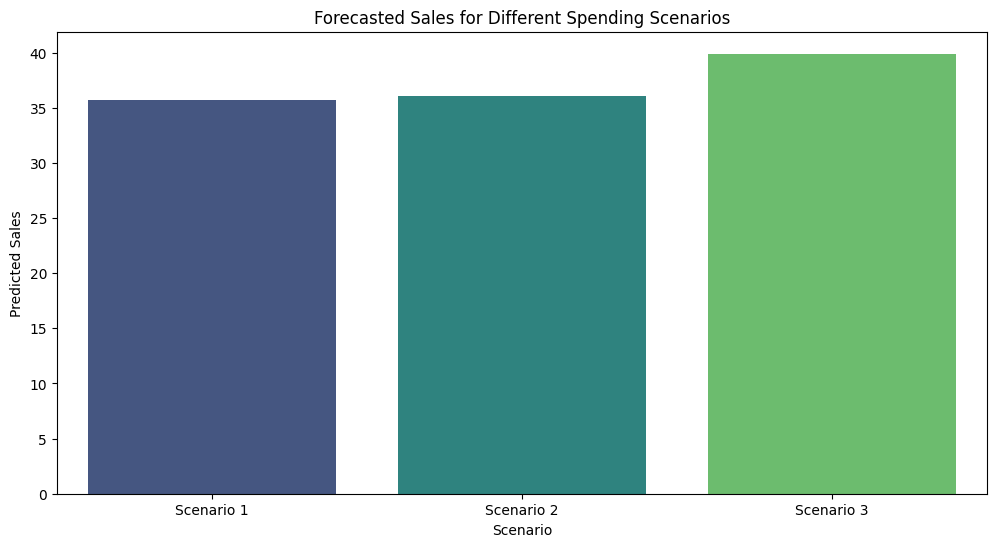

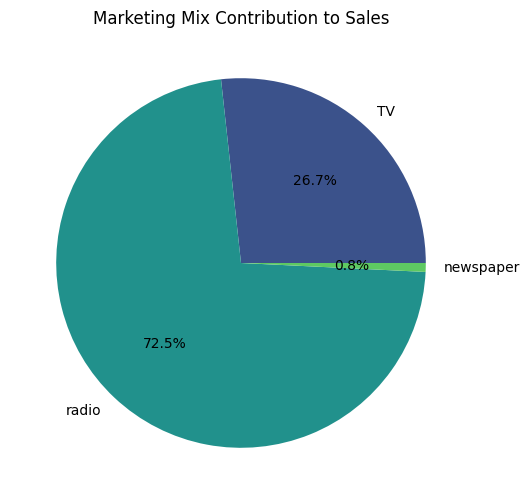

In [2]:
import pandas as pd
import numpy as np

# import the class
from mmmAnalysis import MMMAnalysis

# Load dataset
file_path = 'Advertising.csv'
data = pd.read_csv(file_path)

# Define target and features
target = 'sales'
# date_column = 'Date'  # Optional, only if your dataset has a date column
# date_format = '%d/%m/%Y'  # Format of the date column
features = ['TV', 'radio', 'newspaper']

# Initialize the MMMAnalysis class
mmm = MMMAnalysis(data, target, features, model_type='ridge')

# Perform EDA
mmm.perform_eda()

# Preprocess data
mmm.preprocess_data()

# Fit model
mmm.fit_model()

# Check if the model fit is poor
if np.all(mmm.feature_importance == 0):
    print("The model did not fit the data well. Consider trying one of the other models (e.g., 'ridge' or 'xgboost').")
else:
    # Output R-squared value
    print(f"R-squared value: {mmm.r_squared}")

    # Plot feature importance
    mmm.plot_feature_importance()

    # Calculate ROI and plot
    roi_df = mmm.calculate_roi()
    mmm.plot_roi(roi_df)

    # Define spending scenarios for forecasting
    scenarios = [
        {'TV': 300, 'radio': 100, 'newspaper': 150},
        {'TV': 100, 'radio': 150, 'newspaper': 100},
        {'TV': 400, 'radio': 100, 'newspaper': 50},
    ]

    # Forecast sales for each scenario
    try:
        forecast_results = mmm.forecast_sales(scenarios)

        # Create DataFrame for forecast results
        forecast_df = pd.DataFrame({
            'Scenario': [f'Scenario {i+1}' for i in range(len(scenarios))],
            'Predicted Sales': forecast_results
        })

        # Plot forecast results
        mmm.plot_forecast(forecast_df)

        # Plot media mix contribution
        mmm.plot_media_mix()

    except ScenarioFeatureMismatchError as e:
        print(e)
    except ValueError as e:
        print(f"Error: {e}")

